# M18- Análisis de películas



*   Giaquinta, Adrian
*   Montironi, Sebastian
*   Skrundz, Maycol
*   Velez, Luz María



# Practico 1 - Análisis y Visualización

### Que busco de ustedes en este practico?

- Quiero que se familiaricen con el dataset y que practiquen el análisis de datos con Python
- Háganse preguntas sobre los tipos de relaciones que puedan aparecer a medida que analizan cada atributo.
- Toda visualización que incluyan debe ir acompañada de un titulo y una explicación de lo que sucede.
- No es necesario responder las consignas en orden. Exploren el dataset y ordenen el resumen como les resulte natural

## Consignas

1. De las columnas listadas a continuación, pido mínimamente identificar el tipo de dato, un análisis de la distribución e identificar outliers. La idea es poder responder las preguntas que se sugieren en cada caso, o que simplemente hagan una descripción de los datos como los ven. Las columnas **budget, genres, popularity, revenue, release_date y vote_average** son obligatorias, el resto son opcionales.


In [ ]:
#importamos las librerias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
from ast import literal_eval

In [ ]:
# Enlace del archivo CSV en GitHub
url = 'https://raw.githubusercontent.com/Mentoria-DiploDatos-2023-FaMAFyC/movies-database/main/movies_metadata.csv'

# Cargar el archivo CSV desde el enlace
df = pd.read_csv(url)

df[:3]

for col in ['genres',
            'production_companies',
            'production_countries',
            'spoken_languages']:

    # Accede a todos los dicts de cada lista y guarda el campo 'name' en la lista a retornar
    df[col] = df[col].fillna('[]').apply(literal_eval).apply(
        lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

# Extrae el campo 'name' de cada dict en la columna
df['belongs_to_collection'] = df['belongs_to_collection'].fillna(
    'None').apply(literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else None)

<ipython-input-89-6939862e94cd>:5: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
#vemos informacion del dataset
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45466 non-null  object 
 13  production_countries   45466 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

Definicion *película cinematográfica de largometraje*: Gral. Película cinematográfica que tiene una duración de **sesenta** minutos o superior, o la que, con una duración superior a cuarenta y cinco minutos, es producida en soporte de formato 70 mm, con un mínimo de ocho perforaciones por imagen.
[Fuente](https://https://dpej.rae.es/lema/pel%C3%ADcula-cinematogr%C3%A1fica-de-largometraje)

Tomamos para este ejemplo la duracion de 60 minutos.

In [ ]:
#filtramos la duracion
df_largometraje = df[(df.runtime>=60)]

In [ ]:
#vemos informacion del dataset filtrado
df_largometraje.info()
print(df_largometraje.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41271 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  41271 non-null  object 
 1   belongs_to_collection  4218 non-null   object 
 2   budget                 41271 non-null  object 
 3   genres                 41271 non-null  object 
 4   homepage               7270 non-null   object 
 5   id                     41271 non-null  object 
 6   imdb_id                41261 non-null  object 
 7   original_language      41264 non-null  object 
 8   original_title         41271 non-null  object 
 9   overview               40996 non-null  object 
 10  popularity             41271 non-null  object 
 11  poster_path            41107 non-null  object 
 12  production_companies   41271 non-null  object 
 13  production_countries   41271 non-null  object 
 14  release_date           41230 non-null  object 
 15  re

In [ ]:
#transformamos los tipos de datos

df_largometraje['budget'] = df_largometraje['budget'].astype(float)
df_largometraje['vote_average'] = df_largometraje['vote_average'].astype(float)
df_largometraje['vote_count'] = df_largometraje['vote_count'].astype(float)
df_largometraje['popularity'] = df_largometraje['popularity'].astype(float)
df_largometraje['release_date'] = pd.to_datetime(df_largometraje['release_date'])

<ipython-input-93-fe2b323ca279>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-93-fe2b323ca279>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-93-fe2b323ca279>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-93-fe2b323

In [ ]:
# df con datos transformados y duracion >= 60 minutos
df_largometraje.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41271 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  41271 non-null  object        
 1   belongs_to_collection  4218 non-null   object        
 2   budget                 41271 non-null  float64       
 3   genres                 41271 non-null  object        
 4   homepage               7270 non-null   object        
 5   id                     41271 non-null  object        
 6   imdb_id                41261 non-null  object        
 7   original_language      41264 non-null  object        
 8   original_title         41271 non-null  object        
 9   overview               40996 non-null  object        
 10  popularity             41271 non-null  float64       
 11  poster_path            41107 non-null  object        
 12  production_companies   41271 non-null  object        
 13  p

#  **budget**: presupuesto destinado a la producción de la película
  - Hace falta convertirla a numérica. Porque ocurre esto? Existen valores no numéricos? o fue un error?

  - Como se distribuye?

  - Que relación hay entre budget y revenue?

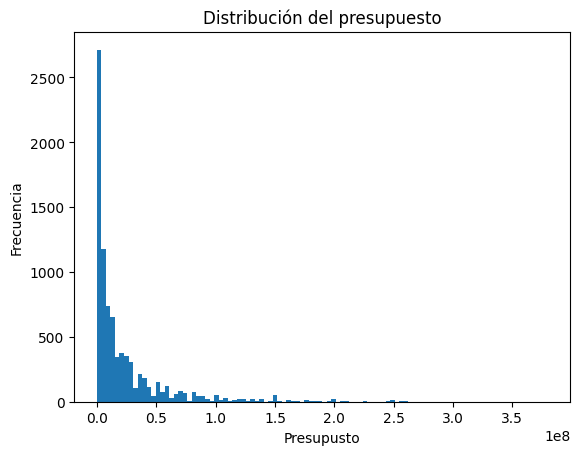

count         8486.00
mean      22591432.01
std       34798242.67
min           1500.00
25%        2500000.00
50%        9725000.00
75%       27000000.00
max      380000000.00
Name: budget, dtype: object

In [ ]:
#Excluyo los 0 y ploteo la distribucion de los datos
filtered_data = [x for x in df_largometraje['budget'] if x > 1000]
not_zeros = pd.DataFrame()
not_zeros['budget'] = filtered_data


plt.hist(filtered_data, bins=100)  # Histograma con 10 bins
plt.xlabel('Presupusto')
plt.ylabel('Frecuencia')
plt.title('Distribución del presupuesto')
plt.show()

not_zeros['budget'].describe().apply(lambda s: '{0:.2f}'.format(s))

matriz de varianza covarianza: 
 [[4.54437770e+15 9.44095251e+14]
 [9.44095251e+14 3.32326867e+14]] 

matriz de correlaciones: 
  [[1.         0.76823816]
 [0.76823816 1.        ]] 

correlación entra ambas variables:  0.7682381604105367 



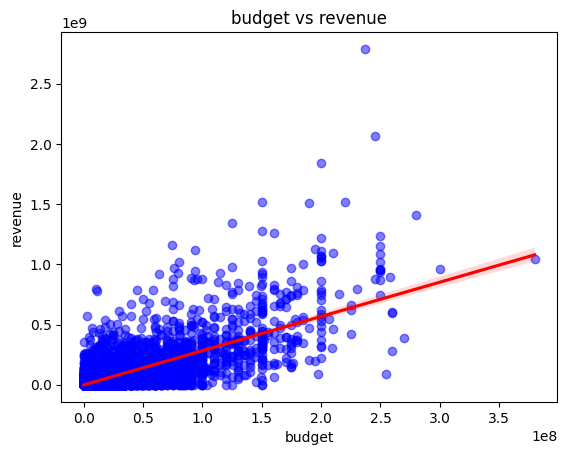

In [ ]:
#creamos el scatter plot y la linea de regresion

sns.regplot(x = 'budget', y = 'revenue',data=df_largometraje,
            scatter_kws = {"color": "blue", "alpha": 0.5},
            line_kws = {"color": "red"}).set(title='budget vs revenue')


matcov=np.cov(df_largometraje.revenue,df_largometraje.budget)
print('matriz de varianza covarianza:','\n',matcov,'\n')

corr=np.corrcoef(df_largometraje.revenue,df_largometraje.budget)
print('matriz de correlaciones: \n ', corr,'\n')

print('correlación entra ambas variables: ',corr[0,1],'\n')

Podemos ver que hay una relacion lineal positiva entre *budget* y *revenue.*

---



# **genres**: lista con los géneros a los que pertenece la película. Puede haber de 0 a N géneros.


*   Como se distribuye la cantidad de géneros que tiene una película?
*   Cual es el genero mas popular?

In [ ]:
df_largometraje['genres'].value_counts()

[Drama]                                                 4745
[Comedy]                                                3102
[Documentary]                                           2201
[]                                                      1547
[Drama, Romance]                                        1274
                                                        ... 
[Mystery, Fantasy, Comedy, Adventure]                      1
[Animation, Drama, Family, Science Fiction, Mystery]       1
[Fantasy, Thriller, Horror]                                1
[Comedy, Action, Drama]                                    1
[Action, Mystery, Thriller, Horror]                        1
Name: genres, Length: 3906, dtype: int64

Como vemos, el género *Drama* es el que más ser repite, seguido de *Comedy* y *Documentary*. Además hay casos en los que una película posee varios géneros mostrando cierta complejidad en su clasificación.
Un dato que llama la atención es la cantidad de peliculas sin clasificar (1547 películas) en el cuarto lugar.

In [ ]:
# Crear un set con todos los géneros
genre_set = set()
df_largometraje['genres'].apply(lambda x: genre_set.update(x))

0        None
1        None
2        None
3        None
4        None
         ... 
45461    None
45462    None
45463    None
45464    None
45465    None
Name: genres, Length: 41271, dtype: object

In [ ]:
# generos ordenados por cantidad de peliculas
genre_count = {}
for genre in genre_set:
    genre_count[genre] = df_largometraje['genres'].apply(lambda x: genre in x).sum()

genre_count = pd.Series(genre_count).sort_values(ascending=False)

# los 10 generos de mas cantidad
print("El TOP 10 de géneros en peliculas es:")
genre_count[:10]

El TOP 10 de géneros en peliculas es:


Drama              19488
Comedy             12108
Thriller            7410
Romance             6522
Action              6310
Horror              4483
Crime               4183
Adventure           3344
Documentary         3259
Science Fiction     2847
dtype: int64

Estos son los géneros en peliculas, los cuales han sido contados individualmente cada uno. Se observa que los 3 primeros cambian a *Drama, Comedy* y *Thriller*

---



<Axes: >

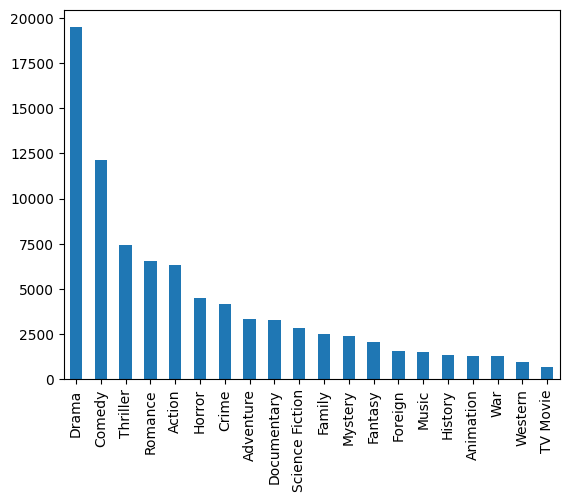

In [ ]:
genre_count.plot(kind='bar')

# - **popularity.** Flotante con un numero que indica la popularidad de la película
  - Similar a budget, hace falta convertirla a numérica.
  - Me interesa comparar esta columna con vote_average. Si existen correlaciones, y en que se diferencian

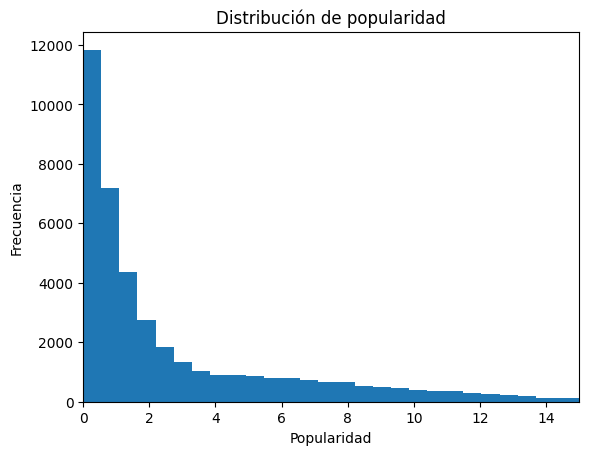

count    41271.000000
mean         3.133576
std          6.237774
min          0.000000
25%          0.457488
50%          1.263175
75%          4.193890
max        547.488298
Name: popularity, dtype: float64

In [ ]:
# Grafico de la distribución
plt.hist(df_largometraje['popularity'], bins=1000)  # Histograma con 10 bins
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.title('Distribución de popularidad')
plt.xlim(0,15)
plt.show()


df_largometraje['popularity'].describe()

In [ ]:
df_largometraje.popularity.describe()
#aca me hace ruido el max si el 75% esta por debajo de 4
#ver que pasa con estos datos y correr de vuelta la correlacion en el scatterplot

count    41271.000000
mean         3.133576
std          6.237774
min          0.000000
25%          0.457488
50%          1.263175
75%          4.193890
max        547.488298
Name: popularity, dtype: float64

In [ ]:
df_largometraje.vote_average.describe()
#parece una escala de 1 al 10

count    41271.000000
mean         5.674445
std          1.816267
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

matriz de varianza covarianza: 
 [[38.90982423  1.74195209]
 [ 1.74195209  3.29882618]] 

matriz de correlaciones: 
  [[1.         0.15375415]
 [0.15375415 1.        ]] 

correlación entra ambas variables:  0.15375415266330497 



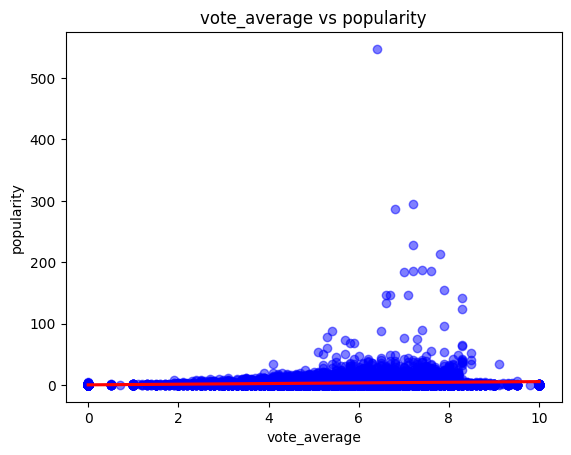

In [ ]:
#creamos el scatter plot y la linea de regresion

sns.regplot(x = 'vote_average', y = 'popularity',data=df_largometraje,
            scatter_kws = {"color": "blue", "alpha": 0.5},
            line_kws = {"color": "red"}).set(title='vote_average vs popularity')


matcov=np.cov(df_largometraje.popularity,df_largometraje.vote_average)
print('matriz de varianza covarianza:','\n',matcov,'\n')

corr=np.corrcoef(df_largometraje.popularity,df_largometraje.vote_average)
print('matriz de correlaciones: \n ', corr,'\n')

print('correlación entra ambas variables: ',corr[0,1],'\n')

El indice de correlacion para estas dos variables es muy bajo (0,45) no es suficiente para obserar una correlacion entre ambas variables.

---



# **budget:** presupuesto destinado a la producción de la película

*  Hace falta convertirla a numérica. Porque ocurre esto? Existen valores no numéricos? o fue un error?
*   Como se distribuye?
*   Que relación hay entre budget y revenue?














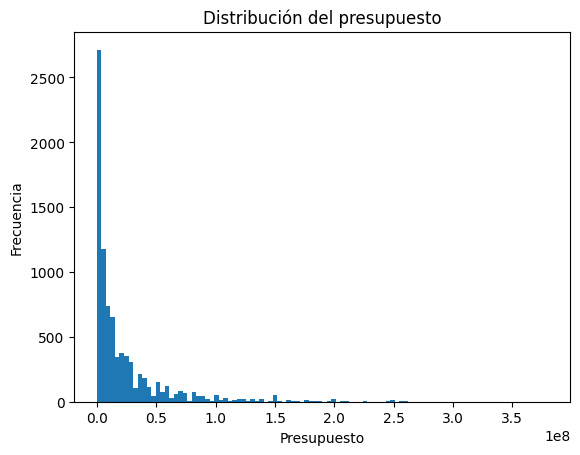

count         8486.00
mean      22591432.01
std       34798242.67
min           1500.00
25%        2500000.00
50%        9725000.00
75%       27000000.00
max      380000000.00
Name: budget, dtype: object

In [ ]:
#Excluyo los 0 y ploteo la distribucion de los datos
filtered_data = [x for x in df_largometraje['budget'] if x > 1000]
not_zeros = pd.DataFrame()
not_zeros['budget'] = filtered_data


plt.hist(filtered_data, bins=100)  # Histograma con 10 bins
plt.xlabel('Presupuesto')
plt.ylabel('Frecuencia')
plt.title('Distribución del presupuesto')
plt.show()

not_zeros['budget'].describe().apply(lambda s: '{0:.2f}'.format(s))

matriz de varianza covarianza: 
 [[4.54437770e+15 9.44095251e+14]
 [9.44095251e+14 3.32326867e+14]] 

matriz de correlaciones: 
  [[1.         0.76823816]
 [0.76823816 1.        ]] 

correlación entra ambas variables:  0.7682381604105367 



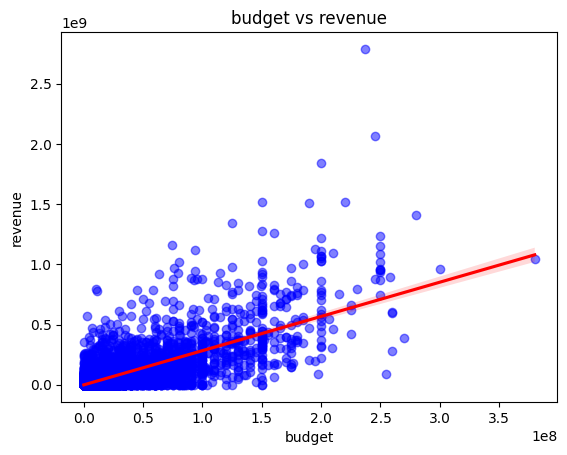

In [ ]:
#creamos el scatter plot y la linea de regresion

sns.regplot(x = 'budget', y = 'revenue',data=df_largometraje,
            scatter_kws = {"color": "blue", "alpha": 0.5},
            line_kws = {"color": "red"}).set(title='budget vs revenue')


matcov=np.cov(df_largometraje.revenue,df_largometraje.budget)
print('matriz de varianza covarianza:','\n',matcov,'\n')

corr=np.corrcoef(df_largometraje.revenue,df_largometraje.budget)
print('matriz de correlaciones: \n ', corr,'\n')

print('correlación entra ambas variables: ',corr[0,1],'\n')

Podemos ver que hay una relacion lineal positiva entre *budget* y *revenue.*

---



# **release_date**. fecha de estreno. Necesario transformarla a formato datetime


*   Me interesaría ver como se distribuyen, sobre todo los años. Para entender la escala temporal que abarcamos.




In [ ]:
df_largometraje['release_date'].value_counts()

2008-01-01    113
2007-01-01     99
2005-01-01     97
2009-01-01     90
2006-01-01     88
             ... 
1935-10-04      1
1963-05-01      1
2004-12-20      1
1936-11-12      1
1917-10-21      1
Name: release_date, Length: 16415, dtype: int64

In [ ]:
#pasamos el formato a YYYY MM DD
pd.to_datetime(df_largometraje.release_date, format ='%Y-%m-%d', errors='coerce')

0       1995-10-30
1       1995-12-15
2       1995-12-22
3       1995-12-22
4       1995-02-10
           ...    
45461          NaT
45462   2011-11-17
45463   2003-08-01
45464   1917-10-21
45465   2017-06-09
Name: release_date, Length: 41271, dtype: datetime64[ns]

In [ ]:
#agrupamos a las peliculas por meses
df_largometraje['release_date'].dt.month

0        10.0
1        12.0
2        12.0
3        12.0
4         2.0
         ... 
45461     NaN
45462    11.0
45463     8.0
45464    10.0
45465     6.0
Name: release_date, Length: 41271, dtype: float64

In [ ]:
#trate de contar las peliculas por meses
df_largometraje.groupby(df_largometraje['release_date'].dt.month).count()

adult  belongs_to_collection  budget  genres  homepage    id  \
release_date                                                                 
1.0            4943                    421    4943    4943       743  4943   
2.0            2796                    265    2796    2796       505  2796   
3.0            3244                    333    3244    3244       588  3244   
4.0            3165                    305    3165    3165       601  3165   
5.0            3097                    316    3097    3097       531  3097   
6.0            2893                    337    2893    2893       528  2893   
7.0            2439                    356    2439    2439       484  2439   
8.0            3171                    356    3171    3171       528  3171   
9.0            4517                    327    4517    4517       865  4517   
10.0           4211                    418    4211    4211       829  4211   
11.0           3353                    338    3353    3353       562  3353   
12.0           3401                    446    3401    3401       499  3401   

              imdb_id  original_language  original_title  overview  ...  \
release_date                                                        ...   
1.0              4942               4941            4943      4887  ...   
2.0              2796               2796            2796      2777  ...   
3.0              3243               3242            3244      3213  ...   
4.0              3164               3165            3165      3143  ...   
5.0              3097               3097            3097      3084  ...   
6.0              2892               2893            2893      2881  ...   
7.0              2439               2439            2439      2430  ...   
8.0              3171               3170            3171      3159  ...   
9.0              4517               4517            4517      4483  ...   
10.0             4208               4210            4211      4190  ...   
11.0             3352               3352            3353      3330  ...   
12.0             3401               3401            3401      3378  ...   

              release_date  revenue  runtime  spoken_languages  status  \
release_date                                                             
1.0                   4943     4943     4943              4943    4926   
2.0                   2796     2796     2796              2796    2791   
3.0                   3244     3244     3244              3244    3243   
4.0                   3165     3165     3165              3165    3161   
5.0                   3097     3097     3097              3097    3097   
6.0                   2893     2893     2893              2893    2891   
7.0                   2439     2439     2439              2439    2437   
8.0                   3171     3171     3171              3171    3163   
9.0                   4517     4517     4517              4517    4510   
10.0                  4211     4211     4211              4211    4210   
11.0                  3353     3353     3353              3353    3349   
12.0                  3401     3401     3401              3401    3400   

              tagline  title  video  vote_average  vote_count  
release_date                                                   
1.0              1932   4943   4943          4943        4943  
2.0              1300   2796   2796          2796        2796  
3.0              1535   3244   3244          3244        3244  
4.0              1586   3165   3165          3165        3165  
5.0              1542   3097   3097          3097        3097  
6.0              1515   2893   2893          2893        2893  
7.0              1424   2439   2439          2439        2439  
8.0              1655   3171   3171          3171        3171  
9.0              2113   4517   4517          4517        4517  
10.0             2046   4211   4211          4211        4211  
11.0             1516   3353   3353          3353        3353  
1

In [ ]:
df_largometraje['release_date'].value_counts()

2008-01-01    113
2007-01-01     99
2005-01-01     97
2009-01-01     90
2006-01-01     88
             ... 
1935-10-04      1
1963-05-01      1
2004-12-20      1
1936-11-12      1
1917-10-21      1
Name: release_date, Length: 16415, dtype: int64

Es interesante que los meses de Enero, Septiembre y Octubre tienen más peliculas estrenadas.




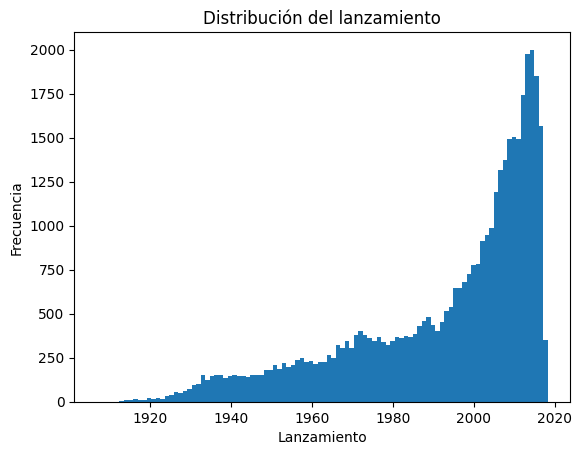

<ipython-input-112-8259d4dff692>:8: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                   41230
unique                  16415
top       2008-01-01 00:00:00
freq                      113
first     1906-12-26 00:00:00
last      2018-04-04 00:00:00
Name: release_date, dtype: object

In [ ]:
# Grafico de la distribución
plt.hist(df_largometraje['release_date'], bins=100)  # Histograma con 10 bins
plt.xlabel('Lanzamiento')
plt.ylabel('Frecuencia')
plt.title('Distribución del lanzamiento')
plt.show()

df_largometraje['release_date'].describe()

Hay un aumento de la cantidad de peliculas a partir de 1990 aproximadamente

---



# **vote_average**. Es la otra variable ademas de popularity que puede ser un indicador directo del éxito. Hacerle un trabajo similar que el que se haga con popularity.

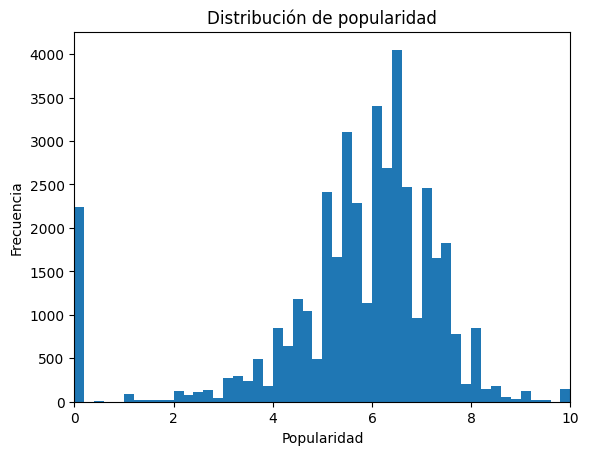

count    41271.000000
mean         5.674445
std          1.816267
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

In [ ]:
# Grafico de la distribución
plt.hist(df_largometraje['vote_average'], bins=50)  # Histograma con 10 bins
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.title('Distribución de popularidad')
plt.xlim(0,10)
plt.show()


df_largometraje['vote_average'].describe()

La distribucion de *vote_average* sigue una distribucion muy parecida a la normal. Se pueden ver varios 0 que corresponden a las peliculas q no tienen votos.

---



# **original_language**: lenguaje original de la película


*   Cuales son los idiomas predominantes?
*   Los idiomas que predominan tienen las películas mas populares?

In [ ]:
df_largometraje['original_language'].value_counts()

en    29666
fr     2116
it     1238
ja     1233
de      923
      ...  
fy        1
cy        1
tg        1
jv        1
si        1
Name: original_language, Length: 89, dtype: int64

Los 5 idiomas predominantes son:
Inglés, Francés, Italiano, Japones y Alemán.



In [ ]:
# Crear la figura y el gráfico scatter
fig = go.Figure(data=go.Scatter(x=df_largometraje['original_language'], y=df_largometraje['vote_average'], mode='markers', text=df_largometraje['title']))
# Personalizar el gráfico
fig.update_layout(
    title='Peliculas más populares por idioma original',
    xaxis_title='Idioma original',
    yaxis_title='Promedio de votaciones',
    xaxis_tickfont=dict(size=7)
)

# Mostrar el gráfico interactivo
fig.show()

En el gráfico anterior podemos ver cual es la pelicula con mayor valoracion por idioma original.

---



# spoken_languages. Idiomas hablados en las películas

*   Que porcentaje de películas se hablan solo en ingles?
*   Como se distribuye la popularidad de las películas según si hablan en ingles o en otros idiomas?

In [ ]:
df_largometraje['spoken_languages'].value_counts()

[English]                                     21133
[]                                             2563
[Français]                                     1644
[日本語]                                          1167
[Italiano]                                     1039
                                              ...  
[English, Français, Slovenčina]                   1
[English, Pусский, العربية, Latin]                1
[Español, Français, English, 普通话, العربية]        1
[Dansk, English, Íslenska, Pусский]               1
[العربية, Polski]                                 1
Name: spoken_languages, Length: 1801, dtype: int64

In [ ]:
# Crear un set con todos los idiomas hablados
spoken_set = set()
df_largometraje['spoken_languages'].apply(lambda x: spoken_set.update(x))

0        None
1        None
2        None
3        None
4        None
         ... 
45461    None
45462    None
45463    None
45464    None
45465    None
Name: spoken_languages, Length: 41271, dtype: object

In [ ]:
# idiomas hablados ordenados por cantidad de peliculas
spoken_count = {}
for spoken in spoken_set:
    spoken_count[spoken] = df_largometraje['spoken_languages'].apply(lambda x: spoken in x).sum()

spoken_count = pd.Series(spoken_count).sort_values(ascending=False)

# los 10 generos de mas cantidad
print("El TOP 10 de idiomas hablados en peliculas es:")
spoken_count[:10]

El TOP 10 de idiomas hablados en peliculas es:


English      27279
Français      3902
Deutsch       2458
Español       2276
Italiano      2166
日本語           1616
Pусский       1442
普通话            777
हिन्दी         661
Português      546
dtype: int64

In [ ]:
import math
english_percent = math.trunc((spoken_count['English']/spoken_count.sum())*100)
print("El porcentaje de peliculas que hablan en ingles es:", english_percent, "%")


El porcentaje de peliculas que hablan en ingles es: 54 %


El idioma más hablado en las peliculas es el Ingles.

---

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 26222 (\N{CJK UNIFIED IDEOGRAPH-666E}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 35805 (\N{CJK UNIFIED IDEOGRAPH-8BDD}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarni

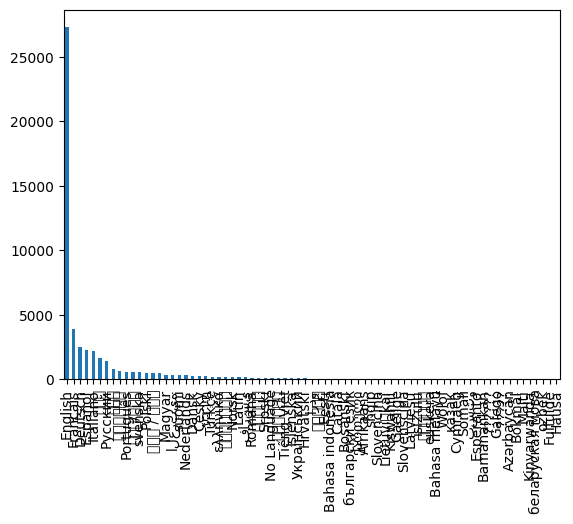

In [ ]:
spoken_count.plot(kind='bar')

# **vote average vs vote count**

In [ ]:
df_vot =  df_largometraje[df_largometraje['vote_count'] > 5]

In [ ]:
# Crear la figura y el gráfico scatter
fig = go.Figure(data=go.Scatter(x=df_vot['release_date'], y=df_vot['vote_average'], mode='markers',
                              text=[f'Titulo: {c1}<br>Cantidad de votos: {c2}' for c1, c2 in zip(df_vot['title'], df_vot['vote_count'])]))
# Personalizar el gráfico
fig.update_layout(
    title='Gráfico Scatter Interactivo',
    xaxis_title='Fecha de estreno',
    yaxis_title='Duracion de la pelicula'
)

# Mostrar el gráfico interactivo
fig.show()

matriz de varianza covarianza: 
 [[53.08910257  0.80486729]
 [ 0.80486729  1.08614828]] 

matriz de correlaciones: 
  [[1.         0.10599296]
 [0.10599296 1.        ]] 

correlación entra ambas variables:  0.10599296145979101 



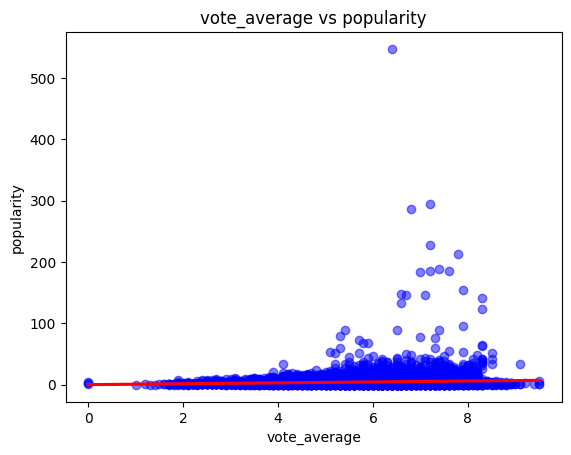

In [ ]:
#creamos el scatter plot y la linea de regresion

sns.regplot(x = 'vote_average', y = 'popularity',data=df_vot,
            scatter_kws = {"color": "blue", "alpha": 0.5},
            line_kws = {"color": "red"}).set(title='vote_average vs popularity')


matcov=np.cov(df_vot.popularity,df_vot.vote_average)
print('matriz de varianza covarianza:','\n',matcov,'\n')

corr=np.corrcoef(df_vot.popularity,df_vot.vote_average)
print('matriz de correlaciones: \n ', corr,'\n')

print('correlación entra ambas variables: ',corr[0,1],'\n')

Repetimos el grafico de de vote average contra popularity para ver si mejoraba la relacion entre variables sin los valores que tienen pocas votaciones. El resultado de correlacion fue de 0.1, siendo mas bajo que antes.Por lo tanto se puede conlcuir que no dan la misma informacion.



---



# **production_companies**: lista de las entidades cinematográficas que participaron en la producción de la película

In [ ]:
df_largometraje['production_companies'].value_counts()

[]                                                                     9650
[Metro-Goldwyn-Mayer (MGM)]                                             732
[Warner Bros.]                                                          507
[Paramount Pictures]                                                    498
[Twentieth Century Fox Film Corporation]                                436
                                                                       ... 
[Twentieth Century Fox Film Corporation, Ubu Productions]                 1
[Fox Searchlight Pictures, 26 Films]                                      1
[Elzévir Films, Cannes Film Festival]                                     1
[Gigantic Pictures, Lucky Hat Entertainment, ITVS, Noruz Films (I)]       1
[Yermoliev]                                                               1
Name: production_companies, Length: 21683, dtype: int64

In [ ]:
companies_set = set()
df_largometraje['production_companies'].apply(lambda x: companies_set.update(x))

0        None
1        None
2        None
3        None
4        None
         ... 
45461    None
45462    None
45463    None
45464    None
45465    None
Name: production_companies, Length: 41271, dtype: object

In [ ]:
# productoras ordenadas por cantidad de peliculas
companies_count = {}
for companies in companies_set:
    companies_count[companies] = df_largometraje['production_companies'].apply(lambda x: companies in x).sum()

companies_count = pd.Series(companies_count).sort_values(ascending=False)

#las 10 productoras con mas cantidad
print("El TOP 10 de productoras es:")
companies_count[:10]

El TOP 10 de productoras es:


Warner Bros.                              1204
Metro-Goldwyn-Mayer (MGM)                 1065
Paramount Pictures                         992
Twentieth Century Fox Film Corporation     827
Universal Pictures                         821
Columbia Pictures Corporation              444
Canal+                                     434
Columbia Pictures                          428
RKO Radio Pictures                         286
New Line Cinema                            277
dtype: int64

Podemos ver que la productora Warner Bros es la que predomina en la industria.

In [ ]:
# Crear la figura y el gráfico scatter
fig = go.Figure(data=go.Scatter(x=companies_count, y=df_largometraje['vote_average'], mode='markers', text=df_largometraje['title']))
# Personalizar el gráfico
fig.update_layout(
    title='Peliculas más populares por productoras',
    xaxis_title='productoras',
    yaxis_title='Promedio de votaciones',
    xaxis_tickfont=dict(size=7)
)

# Mostrar el gráfico interactivo
fig.show()

# **production_countries.** Países donde se produjo la película (puede que no solo tenga que ver con donde se filmo, sino también donde se produjo. Elijan alguna película de ejemplo y verifiquen esto)

In [ ]:
df_Titanic=df_largometraje[df_largometraje.original_title == 'Titanic']
df_Titanic['production_countries'].value_counts()

La pelicula Titanic fue producida conjuntamente entre Estados Unidos y Canada.

---



# title. titulo de la película.


*   No tiene mucho potencial de análisis, pero sirve para nosotros identificar la película y quizás referenciar alguna búsqueda externa.
*   Una buena practica es elegir alguna o varias películas que consideren tengan atributos significativos para referenciar y reconocer en los distintos análisis que realicen sobre las otras variables. Ayuda a interpretar las visualizaciones.

In [ ]:
#buscamos las peliculas con la palabra Star en el titulo
df_star = df_largometraje[df_largometraje.title.str.contains('Star ', case=True)]

print("Lista de peliculas con la palabra Star en el titulo")
print(df_star.title)
print("La cantidad de peliculas con la palabra Star en el titulo es:", len(df_star) )

In [ ]:
#dentro de las peliculas con Star seleccionamos Star Wars
df_star_wars = df_largometraje[df_largometraje.title.str.contains('Star Wars', case=True)]
print("Lista de peliculas con la palabra Star Wars en el titulo")
print(df_star_wars.title)
print("La cantidad de peliculas de Star Wars :", len(df_star_wars) )

# Cual es nuestro indicador de éxito?
Tomamos revenue ya que este dato es facil de comparar y obtener.